For more contex on this code, please read the [README file](https://github.com/Chinnasf/Air-Quality-in-Mexico-City/blob/master/README.md).

**Date of Creation**: Jul 1, 2020<br>
**Author**: Karina Chiñas Fuentes<br>
**Email**: chinnasf@outlook.de

In [1]:
import pandas as pd

# I am going to analyze for Tlanepantla (TLA), as it is near the heart of the city
# and it is available for all samples. To see available locations, you can consult:
# http://www.aire.cdmx.gob.mx/opendata/catalogos/cat_estacion.csv
loc = "TLA"

file_PM = "http://www.aire.cdmx.gob.mx/descargar.php?file=b3BlbmRhdGEvcmVkX21hbnVhbC9yZWRfbWFudWFsX3BhcnRpY3VsYXNfc3VzcC5jc3Y="
file_Pb = "http://www.aire.cdmx.gob.mx/descargar.php?file=b3BlbmRhdGEvcmVkX21hbnVhbC9yZWRfbWFudWFsX3Bsb21vLmNzdg==" 

idx = pd.date_range("01-01-2000","12-31-2015") # usefull for filling missing data


# --------------------------Creating DataFrame for UVA Rays-------------------------------------------

def data_UV(year,x):
    file = f"http://www.aire.cdmx.gob.mx/opendata/radiacion/UV{x}_{year}.csv"
    
# Creating DataFrame for the given year
    df = (pd.read_csv(file, skiprows=range(8)).drop(["unit"],axis=1))
    df = (df[df.cve_station.isin([loc])]
              .drop(["parameter","cve_station"],axis=1) 
              .reset_index()
              .drop("index",axis=1))
# Changing 01:00-24:00 to 00:00-23:00 to set the Date as index
    s  = df["Date"].str.split() 
    df["Date"] = pd.to_datetime(s.str[0]) + pd.to_timedelta(s.str[1].str.split(':').str[0] +' hours')
    df.set_index("Date",inplace=True)
# Obtaining the max value per day within the recorded hours, so my data is per day and not per hour
    df = df.groupby(pd.Grouper(freq="D"))["value"].agg(["max"]).rename(columns={"max":f"UV{x}"})
# Removing leap year days and the first day of the following year
    df = (df[~((df.index.month == 2) & (df.index.day == 29))])[:-1]
# Convert mW/cm2 to mW/m2
    if x == "A":
        df["UVA"] = df["UVA"]*10000 
# Convert MED/h to mW/m2 and obtain UVI-Index
    elif x == "B":
        df["UVB"] = df["UVB"]*50 
        df["UVI"] = df["UVB"]/25 # UVI = UV-Index; which ranges from 0 to 15. 
    
    return df

df_UVA = data_UV(2000,"A")
df_UVB = data_UV(2000,"B")
for y in range(2001,2016):
    df_UVA = pd.concat([df_UVA,data_UV(y,"A")])
    df_UVB = pd.concat([df_UVB,data_UV(y,"B")])

# --------------------------Creating DataFrame for PM2.5 Particles--------------------------------------

df_PM25 = (pd.read_csv(file_PM, skiprows=range(8)).drop(["unit"],axis=1))
df_PM25 = ((df_PM25[df_PM25.cve_station.isin([loc]) & df_PM25.cve_parameter.isin(["PM2.5"]) ])
         .drop(["cve_parameter","cve_station"],axis=1)
         .reset_index()
         .drop("index",axis=1))
df_PM25["Date"] = pd.to_datetime(df_PM25["Date"]) 
df_PM25.set_index("Date",inplace=True)
# Filling missing data with NaN
df_PM25 = df_PM25.reindex(idx)
# Removing leap year days
df_PM25 = (df_PM25[~((df_PM25.index.month == 2) & (df_PM25.index.day == 29))]).rename(columns={"value":"PM2.5"})
df_PM25

# --------------------------Creating DataFrame for PM10 Particles--------------------------------------

df_PM10 = (pd.read_csv(file_PM, skiprows=range(8)).drop(["unit"],axis=1))
df_PM10 = ((df_PM10[df_PM10.cve_station.isin([loc]) & df_PM10.cve_parameter.isin(["PM10"]) ])
         .drop(["cve_parameter","cve_station"],axis=1)
         .reset_index()
         .drop("index",axis=1))
df_PM10["Date"] = pd.to_datetime(df_PM10["Date"])
df_PM10.set_index("Date",inplace=True)
# Filling missing data with NaN
df_PM10 = df_PM10.reindex(idx)
# Removing leap year days
df_PM10 = (df_PM10[~((df_PM10.index.month == 2) & (df_PM10.index.day == 29))]).rename(columns={"value":"PM10"})

# --------------------------Creating DataFrame for Total Suspended Particles (PST)-----------------------

df_PST = (pd.read_csv(file_PM, skiprows=range(8)).drop(["unit"],axis=1))
df_PST = ((df_PST[df_PST.cve_station.isin([loc]) & df_PST.cve_parameter.isin(["PST"]) ])
         .drop(["cve_parameter","cve_station"],axis=1)
         .reset_index()
         .drop("index",axis=1))
df_PST["Date"] = pd.to_datetime(df_PST["Date"])
df_PST.set_index("Date",inplace=True)
# Filling missing data with NaN
df_PST = df_PST.reindex(idx)
# Removing leap year days
df_PST = (df_PST[~((df_PST.index.month == 2) & (df_PST.index.day == 29))]).rename(columns={"value":"PST"})

# --------------------------Creating DataFrame for Lead Particles--------------------------------------

df_Pb = (pd.read_csv(file_Pb, skiprows=range(8)).drop(["unit"],axis=1))
df_Pb = ((df_Pb[df_Pb.cve_station.isin([loc]) & df_Pb.cve_parameter.isin(["PbPST"]) ])
         .drop(["cve_parameter","cve_station"],axis=1)
         .reset_index()
         .drop("index",axis=1))
df_Pb["Date"] = pd.to_datetime(df_Pb["Date"])
df_Pb.set_index("Date",inplace=True)
# Filling missing data with NaN
df_Pb = df_Pb.reindex(idx)
# Removing leap year days
df_Pb = (df_Pb[~((df_Pb.index.month == 2) & (df_Pb.index.day == 29))]).rename(columns={"value":"Pb"})    

In [2]:
# Required tools for personalized plots.

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings

warnings.filterwarnings("ignore")

# Figure Parameters
plt.style.use('seaborn-paper')
matplotlib.rcParams['xtick.labelsize']   = 10
matplotlib.rcParams['ytick.labelsize']   = 10
matplotlib.rcParams['lines.linewidth']   = 1
matplotlib.rcParams['axes.linewidth']    = 0.1

matplotlib.rcParams['xtick.major.size']  = 3.7
matplotlib.rcParams['xtick.major.width'] = 0.7
matplotlib.rcParams['xtick.minor.size']  = 1.7
matplotlib.rcParams['xtick.minor.width'] = 0.7

matplotlib.rcParams['ytick.major.size']  = 3.7
matplotlib.rcParams['ytick.major.width'] = 0.7
matplotlib.rcParams['ytick.minor.size']  = 1.7
matplotlib.rcParams['ytick.minor.width'] = 0.7

matplotlib.rc('text', usetex=True)


%matplotlib notebook

In [3]:
# Useful for plotting the data; the year is irrelevant.
dates = pd.date_range(start='01/01/2015', end='31/12/2015') 

# Creating General DataFrame to obtain general information
df_gen = pd.concat([df_UVA,df_UVB,df_PM25,df_PM10,df_PST,df_Pb],axis=1)

df_gen["Year"]  = df_gen.index.year
df_gen["Month"] = df_gen.index.month
df_gen["Day"]   = df_gen.index.day

# Print general description of the obtained data
df_gen.describe()[["UVA","UVB","UVI","PM2.5","PM10","PST","Pb"]]

,UVA,UVB,UVI,PM2.5,PM10,PST,Pb
count,4890.000000,5051.00000,5051.000000,669.000000,943.000000,942.000000,866.000000
mean,38569.844581,157.91568,6.316627,21.727952,53.288441,130.283439,0.073073
std,12967.582914,55.74645,2.229858,9.080519,20.396535,57.759048,0.070193
min,0.000000,0.00000,0.000000,6.000000,12.000000,26.000000,0.000100
25%,33482.500000,127.50000,5.100000,15.000000,37.000000,88.000000,0.033250
50%,40620.000000,163.20000,6.528000,20.000000,50.000000,119.000000,0.061000
75%,47417.500000,198.20000,7.928000,27.000000,66.000000,160.000000,0.098000
max,63590.000000,287.15000,11.486000,58.000000,143.000000,377.000000,0.964000


<IPython.core.display.Javascript object>


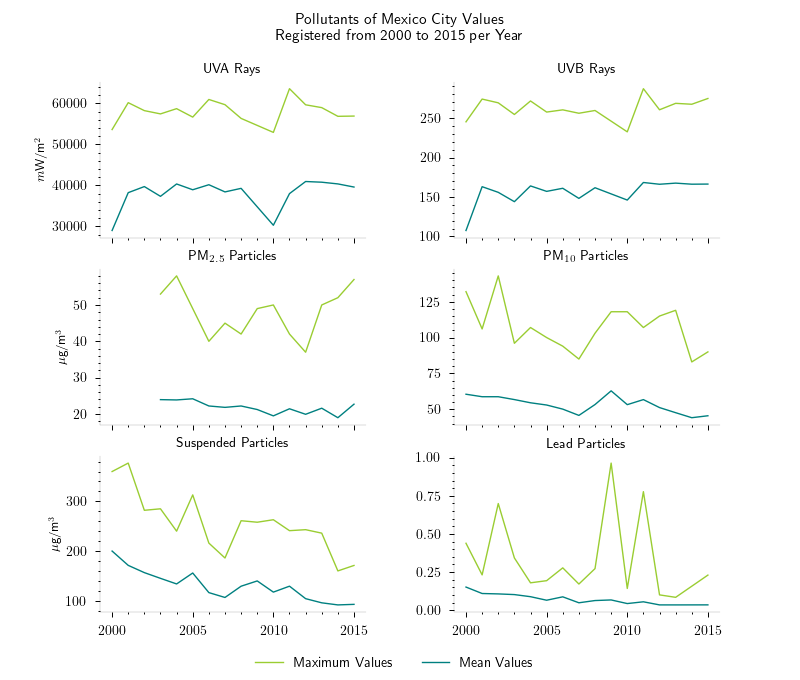

In [4]:
# Obtaining maximum values registered over the days per year (2000 to 2015)
df_max_per_year = df_gen.pivot_table(index=["Month","Day"],
                                     values=["UVA","UVB","UVI","PM2.5","PM10","PST","Pb"],
                                     columns="Year",aggfunc=np.max)

# Obtaining mean values registered over the days per year (2000 to 2015)
df_mean_per_year = df_gen.pivot_table(index=["Month","Day"],
                                      values=["UVA","UVB","UVI","PM2.5","PM10","PST","Pb"],
                                      columns="Year",aggfunc=np.max)


from matplotlib.ticker import AutoMinorLocator

fig,((ax1,ax2),
     (ax3,ax4),
     (ax5,ax6)) = plt.subplots(ncols=2, nrows=3,sharex=True,sharey=False,constrained_layout=False)

fig.set_figheight(6.8),fig.set_figwidth(8)

ax1.plot(df_max_per_year.describe()["UVA"].T["max"], color = "yellowgreen")
ax1.plot(df_mean_per_year.describe()["UVA"].T["mean"], color ="teal")
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax1.set_title("UVA Rays")
ax1.set_ylabel("$m$W/m$^2$")

ax2.plot(df_max_per_year.describe()["UVB"].T["max"], color = "yellowgreen")
ax2.plot(df_mean_per_year.describe()["UVB"].T["mean"], color ="teal")
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax2.set_title("UVB Rays")

ax3.plot(df_max_per_year.describe()["PM2.5"].T["max"], color = "yellowgreen")
ax3.plot(df_mean_per_year.describe()["PM2.5"].T["mean"], color ="teal")
ax3.yaxis.set_minor_locator(AutoMinorLocator())
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)

ax3.set_title("PM$_{2.5}$ Particles")
ax3.set_ylabel("$\mu$g/m$^3$")

ax4.plot(df_max_per_year.describe()["PM10"].T["max"], color = "yellowgreen")
ax4.plot(df_mean_per_year.describe()["PM10"].T["mean"], color ="teal")
ax4.yaxis.set_minor_locator(AutoMinorLocator())
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)

ax4.set_title("PM$_{10}$ Particles")

ax5.plot(df_max_per_year.describe()["PST"].T["max"], color = "yellowgreen")
ax5.plot(df_mean_per_year.describe()["PST"].T["mean"], color ="teal")
ax5.yaxis.set_minor_locator(AutoMinorLocator())
ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)

ax5.set_title("Suspended Particles")
ax5.set_ylabel("$\mu$g/m$^3$")

ax6.plot(df_max_per_year.describe()["Pb"].T["max"], color = "yellowgreen",label = "Maximum Values")
ax6.plot(df_mean_per_year.describe()["Pb"].T["mean"], color ="teal",label = "Mean Values")
ax6.spines['right'].set_visible(False)
ax6.spines['top'].set_visible(False)

ax6.yaxis.set_minor_locator(AutoMinorLocator())
ax6.set_title("Lead Particles")

fig.subplots_adjust(bottom=0.1, wspace=0.33)
ax6.legend(bbox_to_anchor=(0.35,-0.2),frameon=False, fontsize=10,ncol=2)

fig.suptitle("Pollutants of Mexico City Values \n Registered from 2000 to 2015 per Year\n\n",fontsize=11);

<IPython.core.display.Javascript object>


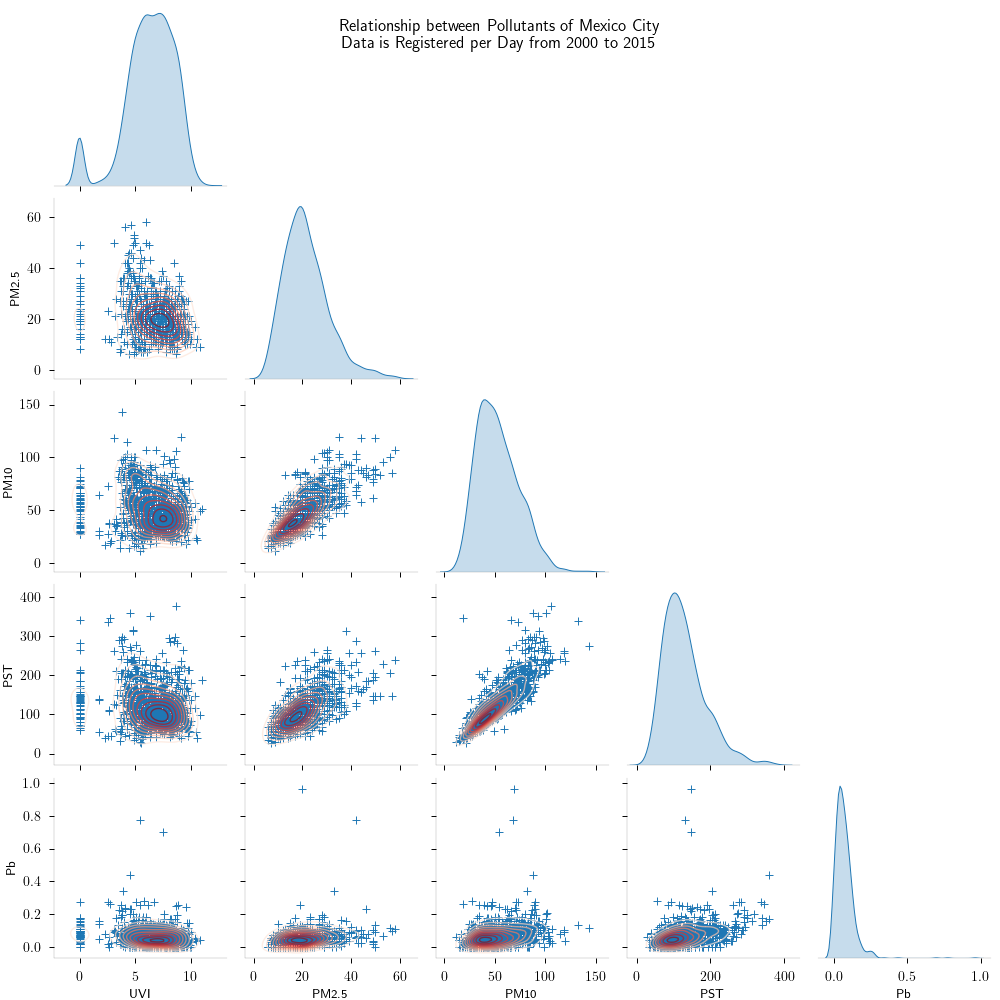

In [5]:
# This will create a visual showing the relationship among pollutants.
grid_max = sns.pairplot(df_gen[["UVI","PM2.5","PM10","PST","Pb"]],
                        plot_kws=dict(linewidth=0.7),
                        diag_kind='kde',height=2,corner=True,markers="+",
                        diag_kws=dict(linewidth=0.7));
grid_max = grid_max.map_lower(sns.kdeplot, cmap = 'Reds',alpha=0.7);
plt.suptitle('Relationship between Pollutants of Mexico City\nData is Registered per Day from 2000 to 2015\n',size = 12);